# Mini Experiment 2: Differentiable PBF Learning - Three Layers

In this experiment, we will use two layers KAN architecture to approximate a Differentiable PBF

Initial the parameter and data

In [12]:
from kan import *
import torch

f = lambda x: (1 - (1 - torch.sigmoid(x[:, [0]]) * torch.sigmoid(x[:, [1]]))) + (1 - (1 - torch.sigmoid(x[:, [2]]) * (1 - torch.sigmoid(x[:, [3]])))) + (1 - torch.sigmoid(x[:, [0]])*(1 - torch.sigmoid(x[:, [3]])))

dataset = create_dataset(f, n_var=4,train_num=3000)
model = KAN(width=[4,2,2,1], grid=10, k=3, seed=0)

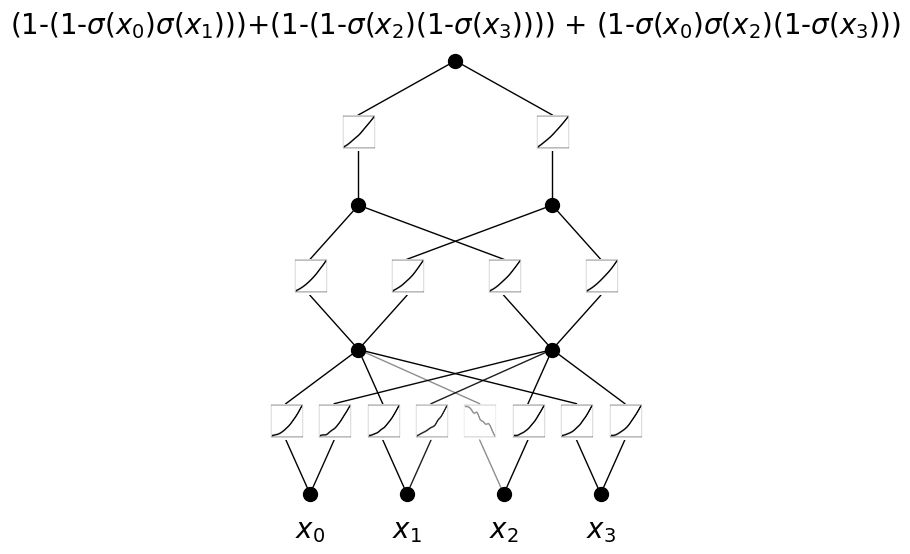

In [7]:
model(dataset['train_input'])
model.plot(beta=100,in_vars=['$x_0$','$x_1$','$x_2$','$x_3$'], out_vars=['(1-(1-$\sigma$($x_0$)$\sigma$($x_1$)))+(1-(1-$\sigma$($x_2$)(1-$\sigma$($x_3$)))) + (1-$\sigma$($x_0$)$\sigma$($x_2$)(1-$\sigma$($x_3$)))'])

## Exp1: width=[4,3,3,1],steps=50,grids=[3,5,10,20,50],opt="LBFGS"

In [21]:
grids = np.array([3,5,10,20,50])

train_rmse = []
test_rmse = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,3,3,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,3,3,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 3.88e-04 | test loss: 3.98e-04 | reg: 1.86e+01 : 100%|██| 50/50 [00:34<00:00,  1.43it/s]
train loss: 1.55e-04 | test loss: 1.81e-04 | reg: 1.89e+01 : 100%|██| 50/50 [00:37<00:00,  1.34it/s]
train loss: 1.07e-04 | test loss: 1.39e-04 | reg: 1.89e+01 : 100%|██| 50/50 [00:39<00:00,  1.26it/s]
train loss: 1.16e-04 | test loss: 1.79e-04 | reg: 1.91e+01 : 100%|██| 50/50 [00:48<00:00,  1.03it/s]
train loss: 2.96e-04 | test loss: 6.99e-04 | reg: 1.95e+01 : 100%|██| 50/50 [01:51<00:00,  2.23s/it]


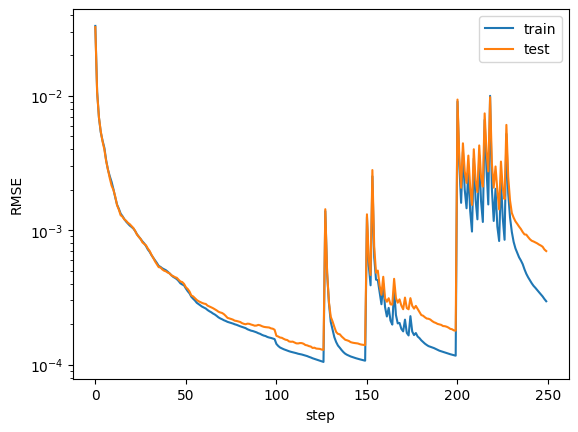

In [23]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

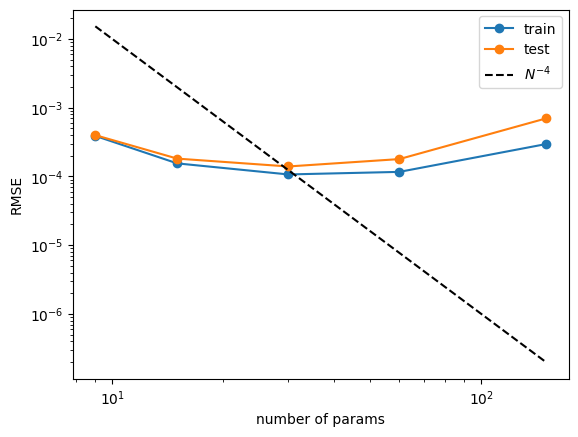

In [26]:
n_params = 3 * grids
train_vs_G = train_rmse[(steps-1)::steps]
test_vs_G = test_rmse[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

## Exp2: width=[4,2,2,1],steps=50,grids=[3,5,10,20,50],opt="LBFGS"

In [29]:
grids = np.array([3,5,10,20,50])

train_rmse = []
test_rmse = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,2,2,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,2,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 1.58e-02 | test loss: 1.66e-02 | reg: 1.24e+01 : 100%|██| 50/50 [00:25<00:00,  1.95it/s]
train loss: 1.48e-02 | test loss: 1.58e-02 | reg: 1.22e+01 : 100%|██| 50/50 [00:26<00:00,  1.91it/s]
train loss: 1.26e-02 | test loss: 1.43e-02 | reg: 1.23e+01 : 100%|██| 50/50 [00:26<00:00,  1.86it/s]
train loss: 1.10e-02 | test loss: 1.56e-02 | reg: 1.23e+01 : 100%|██| 50/50 [00:30<00:00,  1.66it/s]
train loss: 7.97e-03 | test loss: 2.33e-02 | reg: 1.27e+01 : 100%|██| 50/50 [00:50<00:00,  1.01s/it]


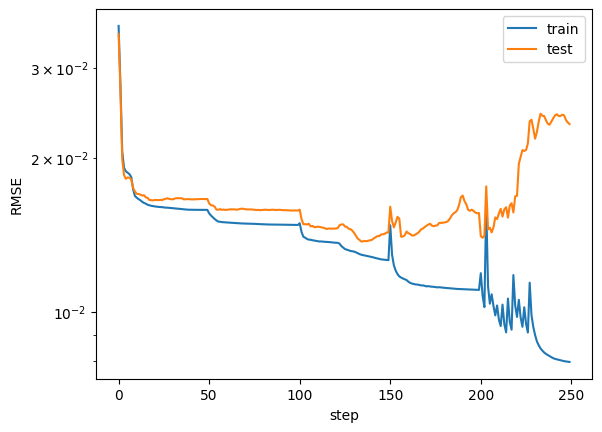

In [30]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

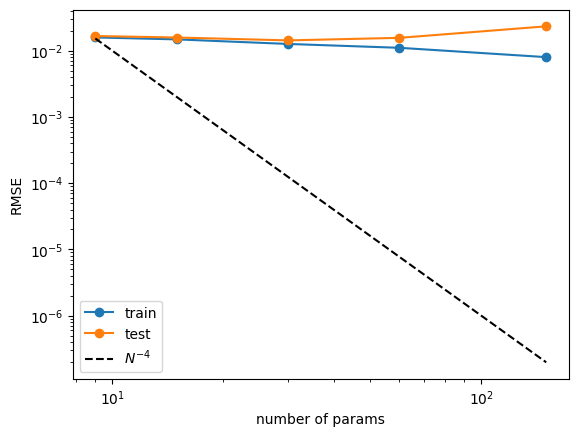

In [31]:
n_params = 3 * grids
train_vs_G = train_rmse[(steps-1)::steps]
test_vs_G = test_rmse[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

## Exp3: width=[4,4,2,1], steps=50,grids=[3,5,10,20,50],opt="LBFGS"

In [33]:
grids = np.array([3,5,10,20,50])

train_rmse = []
test_rmse = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 2.02e-04 | test loss: 2.05e-04 | reg: 1.73e+01 : 100%|██| 50/50 [00:32<00:00,  1.55it/s]
train loss: 4.83e-05 | test loss: 5.20e-05 | reg: 1.74e+01 : 100%|██| 50/50 [00:34<00:00,  1.44it/s]
train loss: 1.71e-05 | test loss: 2.28e-05 | reg: 1.74e+01 : 100%|██| 50/50 [00:38<00:00,  1.29it/s]
train loss: 1.07e-05 | test loss: 1.64e-05 | reg: 1.74e+01 : 100%|██| 50/50 [00:29<00:00,  1.67it/s]
train loss: 1.64e-04 | test loss: 1.55e-03 | reg: 1.75e+01 : 100%|██| 50/50 [01:53<00:00,  2.26s/it]


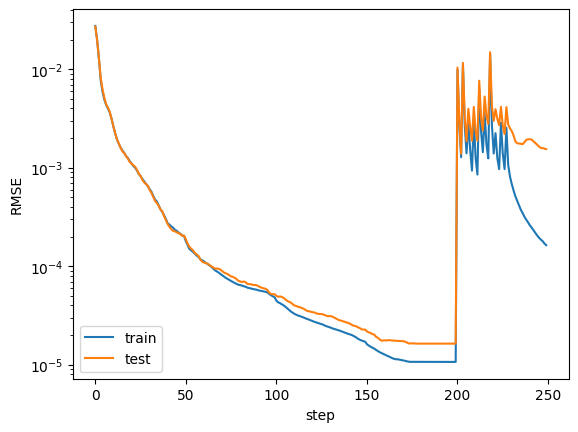

In [34]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Text(0, 0.5, 'RMSE')

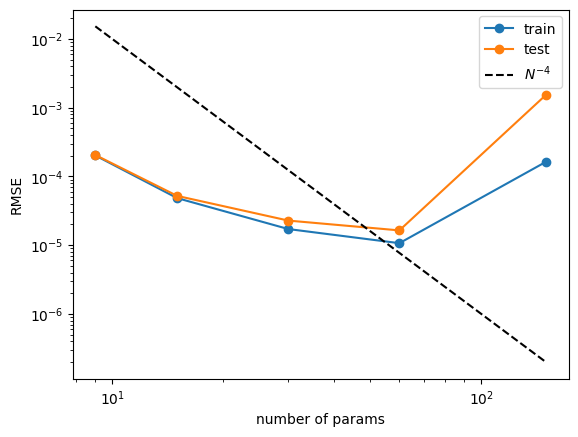

In [35]:
n_params = 3 * grids
train_vs_G = train_rmse[(steps-1)::steps]
test_vs_G = test_rmse[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

In [36]:
grids = np.array([3,5,10,20,50])

train_rmse = []
test_rmse = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,4,3,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,4,3,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 1.99e-04 | test loss: 2.23e-04 | reg: 2.07e+01 : 100%|██| 50/50 [00:38<00:00,  1.30it/s]
train loss: 7.32e-05 | test loss: 8.05e-05 | reg: 2.08e+01 : 100%|██| 50/50 [00:38<00:00,  1.31it/s]
train loss: 3.64e-05 | test loss: 4.53e-05 | reg: 2.08e+01 : 100%|██| 50/50 [00:41<00:00,  1.20it/s]
train loss: 4.72e-05 | test loss: 1.92e-04 | reg: 2.10e+01 : 100%|██| 50/50 [01:00<00:00,  1.21s/it]
train loss: 3.23e-04 | test loss: 1.62e-03 | reg: 2.22e+01 : 100%|██| 50/50 [02:31<00:00,  3.02s/it]


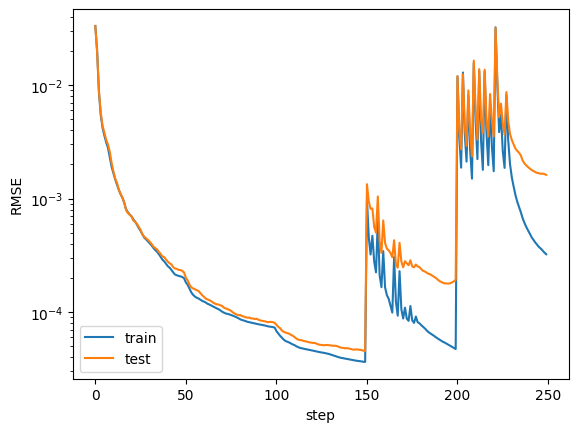

In [38]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

## Exp4: width=[4,3,2,1], steps=50,grids=[3,5,10,20,50],opt="LBFGS"

In [39]:
grids = np.array([3,5,10,20,50])

train_rmse = []
test_rmse = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,3,2,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,3,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 2.22e-04 | test loss: 2.33e-04 | reg: 1.62e+01 : 100%|██| 50/50 [00:30<00:00,  1.63it/s]
train loss: 9.21e-05 | test loss: 1.04e-04 | reg: 1.63e+01 : 100%|██| 50/50 [00:29<00:00,  1.68it/s]
train loss: 6.03e-05 | test loss: 7.77e-05 | reg: 1.63e+01 : 100%|██| 50/50 [00:32<00:00,  1.56it/s]
train loss: 1.52e-04 | test loss: 5.11e-04 | reg: 1.50e+01 : 100%|██| 50/50 [00:40<00:00,  1.24it/s]
train loss: 3.25e-04 | test loss: 2.18e-03 | reg: 1.71e+01 : 100%|██| 50/50 [01:24<00:00,  1.70s/it]


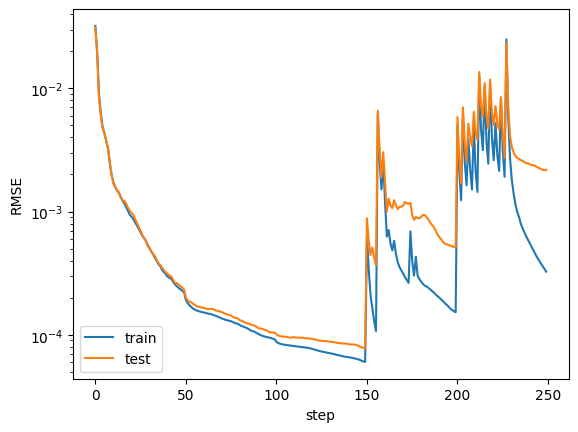

In [40]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

## Exp5: width=[4,4,3,1],steps=50,grids=[3,5,10,15,20],opt="LBFGS"

In [41]:
grids = np.array([3,5,10,15,20])

train_rmse = []
test_rmse = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,4,3,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,4,3,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 2.07e-04 | test loss: 2.37e-04 | reg: 2.07e+01 : 100%|██| 50/50 [00:38<00:00,  1.32it/s]
train loss: 7.13e-05 | test loss: 7.70e-05 | reg: 2.07e+01 : 100%|██| 50/50 [00:41<00:00,  1.19it/s]
train loss: 3.73e-05 | test loss: 4.72e-05 | reg: 2.08e+01 : 100%|██| 50/50 [00:47<00:00,  1.05it/s]
train loss: 5.37e-05 | test loss: 2.42e-04 | reg: 2.10e+01 : 100%|██| 50/50 [00:57<00:00,  1.15s/it]
train loss: 4.02e-05 | test loss: 2.40e-04 | reg: 2.11e+01 : 100%|██| 50/50 [01:13<00:00,  1.47s/it]


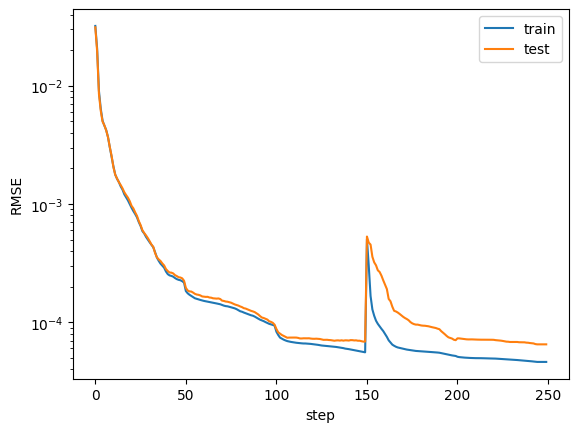

In [45]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

## Exp6: width=[4,3,2,1],steps=50,grids=[3,5,10,15,20],opt=“LBFGS”

In [43]:
grids = np.array([3,5,10,15,20])

train_rmse = []
test_rmse = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,3,2,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,3,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 2.16e-04 | test loss: 2.24e-04 | reg: 1.63e+01 : 100%|██| 50/50 [00:31<00:00,  1.59it/s]
train loss: 9.35e-05 | test loss: 9.53e-05 | reg: 1.64e+01 : 100%|██| 50/50 [00:30<00:00,  1.64it/s]
train loss: 5.56e-05 | test loss: 6.86e-05 | reg: 1.64e+01 : 100%|██| 50/50 [00:32<00:00,  1.56it/s]
train loss: 5.18e-05 | test loss: 7.05e-05 | reg: 1.64e+01 : 100%|██| 50/50 [00:37<00:00,  1.33it/s]
train loss: 4.61e-05 | test loss: 6.50e-05 | reg: 1.65e+01 : 100%|██| 50/50 [00:36<00:00,  1.36it/s]


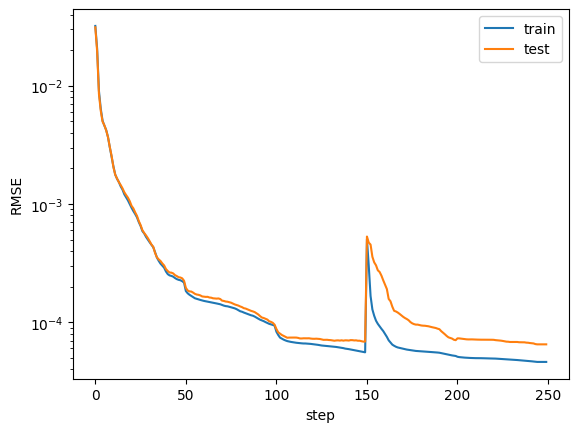

In [44]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

## Exp7: width=[4,4,2,1],steps=50,grids=[3,5,10,15,20],opt=“LBFGS”

In [46]:
grids = np.array([3,5,10,15,20])

train_rmse = []
test_rmse = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 3.00e-04 | test loss: 3.20e-04 | reg: 1.75e+01 : 100%|██| 50/50 [00:32<00:00,  1.52it/s]
train loss: 5.75e-05 | test loss: 6.44e-05 | reg: 1.75e+01 : 100%|██| 50/50 [00:34<00:00,  1.45it/s]
train loss: 2.37e-05 | test loss: 2.90e-05 | reg: 1.75e+01 : 100%|██| 50/50 [00:38<00:00,  1.31it/s]
train loss: 1.70e-05 | test loss: 2.26e-05 | reg: 1.75e+01 : 100%|██| 50/50 [00:29<00:00,  1.71it/s]
train loss: 1.53e-05 | test loss: 2.18e-05 | reg: 1.75e+01 : 100%|██| 50/50 [00:31<00:00,  1.57it/s]


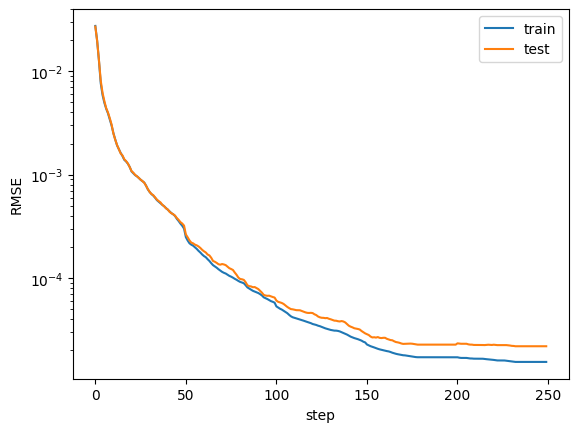

In [47]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

## Exp7: width=[4,4,2,1],steps=50,grids=[5,10,15,20,25],opt=“LBFGS”

In [48]:
grids = np.array([5,10,15,20,25])

train_rmse = []
test_rmse = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 2.89e-04 | test loss: 2.94e-04 | reg: 1.71e+01 : 100%|██| 50/50 [00:35<00:00,  1.42it/s]
train loss: 6.42e-05 | test loss: 7.67e-05 | reg: 1.71e+01 : 100%|██| 50/50 [00:38<00:00,  1.28it/s]
train loss: 2.42e-05 | test loss: 3.36e-05 | reg: 1.72e+01 : 100%|██| 50/50 [00:43<00:00,  1.15it/s]
train loss: 1.53e-05 | test loss: 2.67e-05 | reg: 1.72e+01 : 100%|██| 50/50 [00:40<00:00,  1.24it/s]
train loss: 5.16e-05 | test loss: 2.68e-03 | reg: 1.73e+01 : 100%|██| 50/50 [01:01<00:00,  1.23s/it]


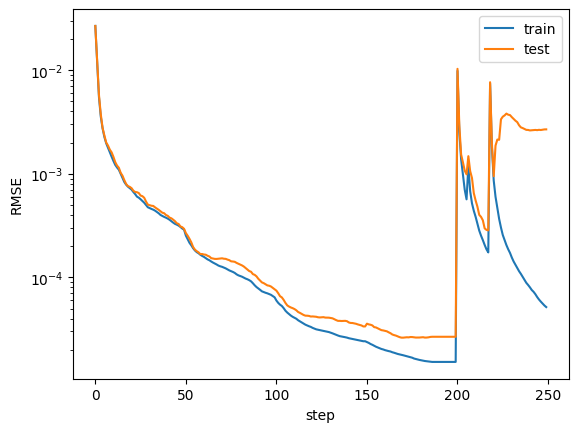

In [49]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

## Exp8: width=[4,4,2,1],steps=50,grids=[3,5,10,20],opt=“LBFGS”

In [51]:
grids = np.array([5,10,15,20,25])

train_rmse = []
test_rmse = []
steps = 65
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 2.25e-04 | test loss: 2.29e-04 | reg: 1.71e+01 : 100%|██| 65/65 [00:45<00:00,  1.44it/s]
train loss: 4.74e-05 | test loss: 5.48e-05 | reg: 1.72e+01 : 100%|██| 65/65 [00:50<00:00,  1.29it/s]
train loss: 2.04e-05 | test loss: 2.55e-05 | reg: 1.72e+01 : 100%|██| 65/65 [00:49<00:00,  1.31it/s]
train loss: 1.34e-05 | test loss: 1.86e-05 | reg: 1.72e+01 : 100%|██| 65/65 [00:39<00:00,  1.63it/s]
train loss: 1.22e-04 | test loss: 4.09e-04 | reg: 1.73e+01 : 100%|██| 65/65 [01:19<00:00,  1.23s/it]


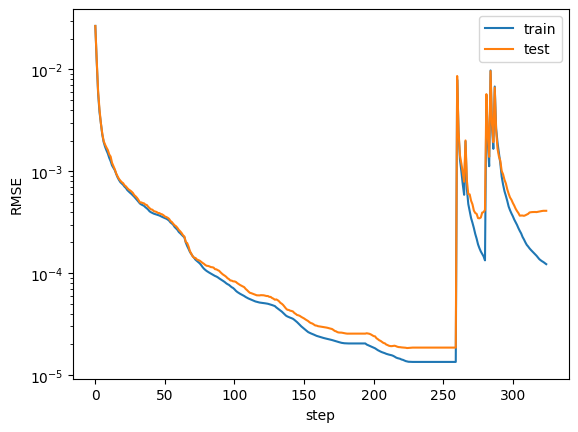

In [52]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

## Exp9: width=[4,4,2,1],steps=80,grids=[3,5,10],opt=“LBFGS”

In [18]:
grids = np.array([3,5,10])

train_rmse = []
test_rmse = []
steps = 80
k = 3
model = KAN(width=[4,4,2,1], grid=10, k=3)

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 1.81e-04 | test loss: 1.79e-04 | reg: 1.75e+01 : 100%|██| 80/80 [01:16<00:00,  1.05it/s]
train loss: 5.00e-05 | test loss: 5.39e-05 | reg: 1.75e+01 : 100%|██| 80/80 [01:40<00:00,  1.26s/it]
train loss: 1.35e-05 | test loss: 1.55e-05 | reg: 1.75e+01 : 100%|██| 80/80 [00:45<00:00,  1.77it/s]


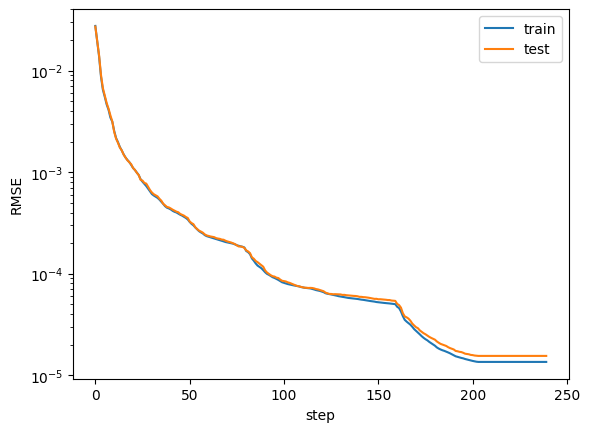

In [19]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

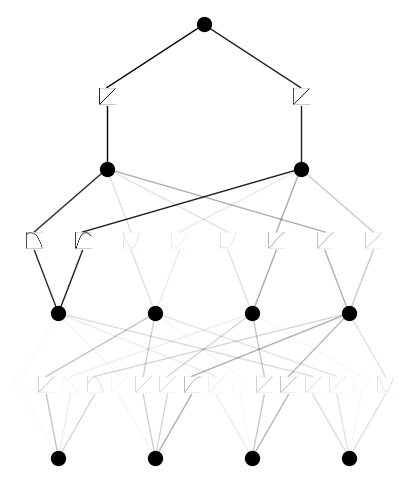

In [20]:
model.plot()

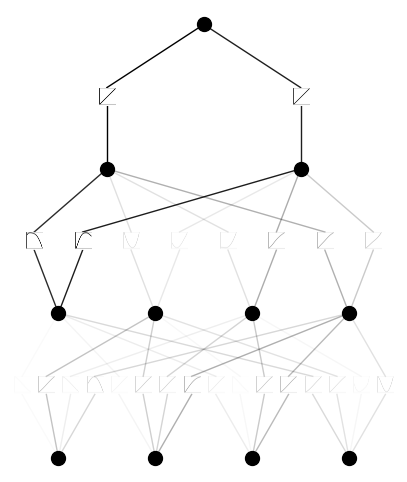

In [25]:
model.prune(threshold=1e-4)
model(dataset['train_input'])
model.plot(mask=True)

Text(0, 0.5, 'RMSE')

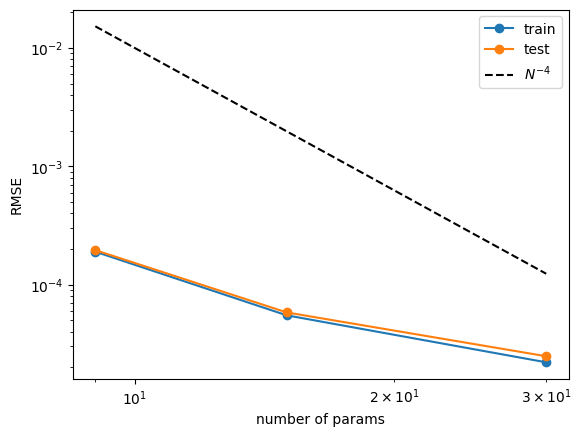

In [16]:
n_params = 3 * grids
train_vs_G = train_rmse[(steps-1)::steps]
test_vs_G = test_rmse[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('RMSE')

In [78]:
grids = np.array([5,10,15])

train_rmse = []
test_rmse = []
steps = 80
k = 3
model = KAN(width=[4,4,2,1], grid=10, k=3)

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[4,4,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_rmse += results['train_loss']
    test_rmse += results['test_loss']

train loss: 1.60e-04 | test loss: 1.65e-04 | reg: 1.72e+01 : 100%|██| 80/80 [00:54<00:00,  1.47it/s]
train loss: 3.19e-05 | test loss: 3.64e-05 | reg: 1.72e+01 : 100%|██| 80/80 [00:50<00:00,  1.59it/s]
train loss: 1.54e-05 | test loss: 2.27e-05 | reg: 1.72e+01 : 100%|██| 80/80 [00:46<00:00,  1.72it/s]


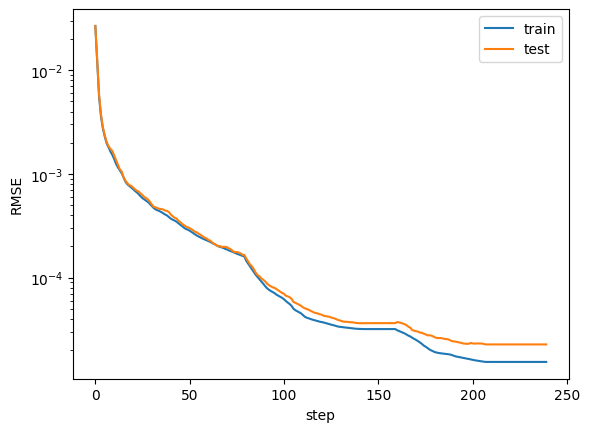

In [79]:
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')